## Importing Packages

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [3]:
# link to import data
data_url="https://www.berlin.de/sen/uvk/_assets/verkehr/infrastruktur/oeffentliche-toiletten/berliner-toiletten-standorte.xlsx"

## Importing data from source


In [4]:
data = pd.read_excel(data_url)

## Viewing data

In [5]:
data.head()

,Stand:27.04.2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",NaN,14109,Deutschland,"13,240574813","52,453581173",1,0,"0,00",0,0,0,0,5,0,269
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",NaN,14129,Deutschland,"13,1992287644287","52,4365068880875",1,0,"0,00",0,0,0,0,5,0,NaN


## Fixing data structure

In [6]:
# Making row 2 the column headings
data.columns = data.iloc[2]

In [7]:
data.head()

2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",NaN,14109,Deutschland,"13,240574813","52,453581173",1,0,"0,00",0,0,0,0,5,0,269
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",NaN,14129,Deutschland,"13,1992287644287","52,4365068880875",1,0,"0,00",0,0,0,0,5,0,NaN


In [8]:
# dropping redundant rows
data.drop([0,1,2],inplace=True)

## Exploring data

In [9]:
data.shape

(440, 19)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 3 to 442
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LavatoryID               440 non-null    object
 1   Description              440 non-null    object
 2   City                     440 non-null    object
 3   Street                   440 non-null    object
 4   Number                   0 non-null      object
 5   PostalCode               440 non-null    object
 6   Country                  440 non-null    object
 7   Longitude                440 non-null    object
 8   Latitude                 440 non-null    object
 9   isOwnedByWall            440 non-null    object
 10  isHandicappedAccessible  440 non-null    object
 11  Price                    440 non-null    object
 12  canBePayedWithCoins      440 non-null    object
 13  canBePayedInApp          440 non-null    object
 14  canBePayedWithNFC        440 non-null    o

## Exploring missing data

In [11]:
data.isnull().sum()

2
LavatoryID                   0
Description                  0
City                         0
Street                       0
Number                     440
PostalCode                   0
Country                      0
Longitude                    0
Latitude                     0
isOwnedByWall                0
isHandicappedAccessible      0
Price                        0
canBePayedWithCoins          0
canBePayedInApp              0
canBePayedWithNFC            0
hasChangingTable             0
LabelID                      0
hasUrinal                    0
FID                         91
dtype: int64

<AxesSubplot:>

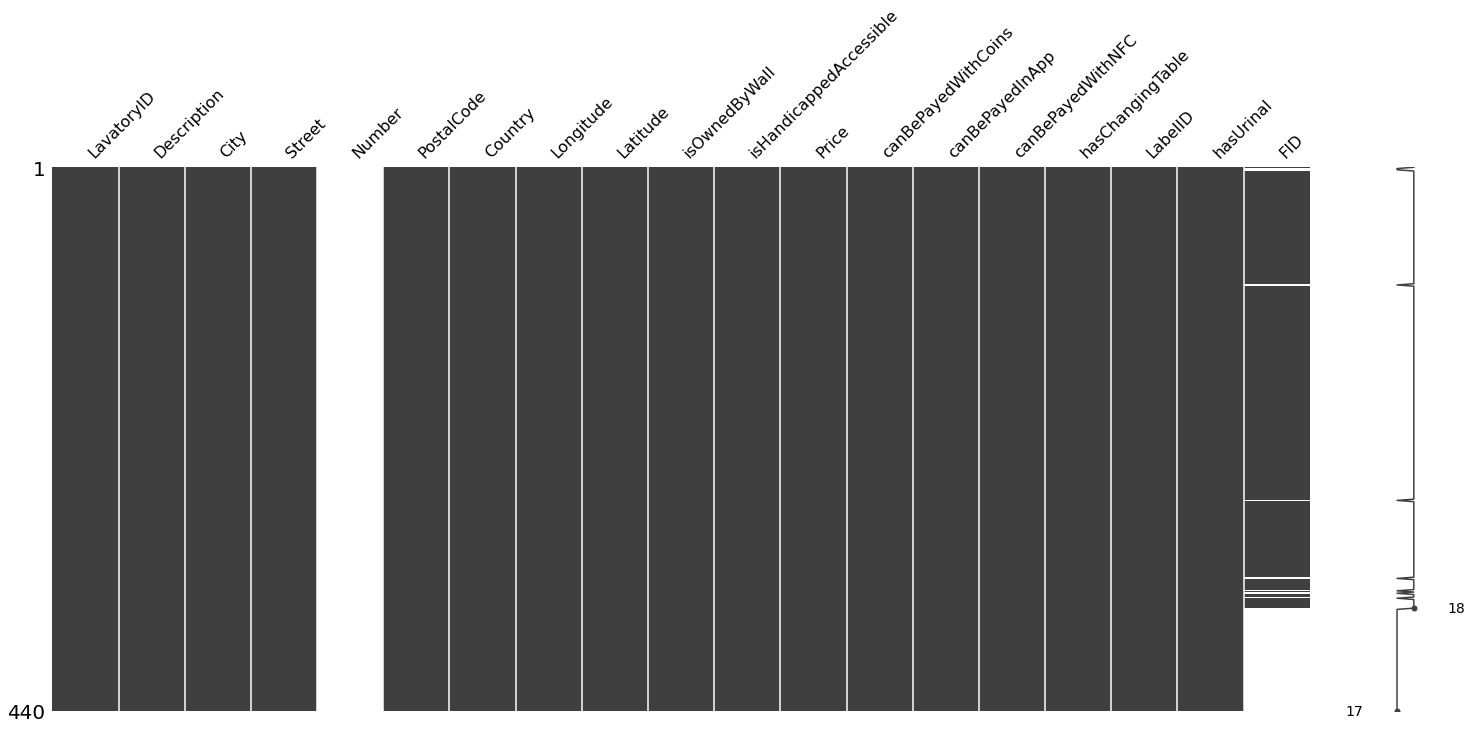

In [12]:
msno.matrix(data)

##### Since FID is an external identification number and does not affect our app we leave the missing numbers
##### Number Column is the House number/Location, since all the values are missing and the location can also be detected using the lattitude and longitude columns we will leave the missing values as they are 

## Extracting opening hours and address from Street column

In [13]:
df1=pd.DataFrame({'Street':data['Street']})
df1[['address','timings']]=df1['Street'].str.split('(',n=1,expand=True)
df1['timings']=df1['timings'].str.extract('([0-9]+-[0-9]+)')
df1[['opening_hour','closing_hour']]=df1['timings'].str.split("-",n=1,expand=True)
data['opening_hours']=df1['opening_hour']+str(':00')+str('-')+df1['closing_hour']+str(':00')
data['street_address']=df1['address']
data=data[['LavatoryID', 'Description', 'City', 'Street','opening_hours', 'street_address', 'Number', 'PostalCode',
       'Country', 'Longitude', 'Latitude', 'isOwnedByWall',
       'isHandicappedAccessible', 'Price', 'canBePayedWithCoins',
       'canBePayedInApp', 'canBePayedWithNFC', 'hasChangingTable', 'LabelID',
       'hasUrinal', 'FID' ]]

In [14]:
# Deleting Number column as it add no value
data.drop('Number', axis=1, inplace=True)
data.drop('FID', axis=1, inplace=True)

In [15]:
data.head()

2,LavatoryID,Description,City,Street,opening_hours,street_address,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",0:00-24:00,"Krumme Lanke, Quermatenweg",14109,Deutschland,"13,240574813","52,453581173",1,0,"0,00",0,0,0,0,5,0
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",0:00-24:00,"Schlachtensee , Am Schlachtensee ggü. 145",14129,Deutschland,"13,1992287644287","52,4365068880875",1,0,"0,00",0,0,0,0,5,0
5,Wall_115753,Toilette Am Kiesteich 50,Berlin,Spektepark (0-24 Uhr),0:00-24:00,Spektepark,13589,Deutschland,"13,1648593254089","52,5488398803196",1,0,"0,00",0,0,0,0,5,0
6,Wall_116738,"Wall CT, Hubertusdamm",Berlin,Hubertusdamm ggü. 7 (0-24 Uhr),0:00-24:00,Hubertusdamm ggü. 7,13125,Deutschland,"13,4711982596938","52,615670613826",1,1,"0,50",1,1,1,1,1,1
7,Wall_116739,"Wall CT, Lindenufer",Berlin,Lindenufer ggü. 10 (0-24 Uhr),0:00-24:00,Lindenufer ggü. 10,13597,Deutschland,"13,2077640060379","52,537351114776",1,1,"0,50",1,1,1,1,1,0


In [16]:
#Replacing values to make more sense
data["isOwnedByWall"] = data["isOwnedByWall"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["isHandicappedAccessible"] = data["isHandicappedAccessible"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["canBePayedWithCoins"] = data["canBePayedWithCoins"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["canBePayedInApp"] = data["canBePayedInApp"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["canBePayedWithNFC"] = data["canBePayedWithNFC"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["hasChangingTable"] = data["hasChangingTable"].replace(to_replace=[1, 0], value=["Yes", "No/Unknown"])
data["hasUrinal"] = data["hasUrinal"].replace(to_replace=[1, 0], value=["Yes", "No"])

In [17]:
data['Latitude']=data['Latitude'].str.replace(',', '.').astype(np.float64)
data['Longitude']=data['Longitude'].str.replace(',', '.').astype(np.float64)
#data['Price']=data['Price'].str.replace(',', '.').astype(np.float64)

In [18]:
data["LabelID"] = data["LabelID"].replace(to_replace=[1, 2,3,4,5,6], value=["Berliner Toilette", "City Toilette","WC-Center","Café Achteck","weitere ÖTs (z.B. Sanitärcontainer)","Toilette nicht von Wall"])

In [19]:
data.head()

2,LavatoryID,Description,City,Street,opening_hours,street_address,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",0:00-24:00,"Krumme Lanke, Quermatenweg",14109,Deutschland,13.240575,52.453581,Yes,No,"0,00",No,No,No,No/Unknown,weitere ÖTs (z.B. Sanitärcontainer),No
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",0:00-24:00,"Schlachtensee , Am Schlachtensee ggü. 145",14129,Deutschland,13.199229,52.436507,Yes,No,"0,00",No,No,No,No/Unknown,weitere ÖTs (z.B. Sanitärcontainer),No
5,Wall_115753,Toilette Am Kiesteich 50,Berlin,Spektepark (0-24 Uhr),0:00-24:00,Spektepark,13589,Deutschland,13.164859,52.548840,Yes,No,"0,00",No,No,No,No/Unknown,weitere ÖTs (z.B. Sanitärcontainer),No
6,Wall_116738,"Wall CT, Hubertusdamm",Berlin,Hubertusdamm ggü. 7 (0-24 Uhr),0:00-24:00,Hubertusdamm ggü. 7,13125,Deutschland,13.471198,52.615671,Yes,Yes,"0,50",Yes,Yes,Yes,Yes,Berliner Toilette,Yes
7,Wall_116739,"Wall CT, Lindenufer",Berlin,Lindenufer ggü. 10 (0-24 Uhr),0:00-24:00,Lindenufer ggü. 10,13597,Deutschland,13.207764,52.537351,Yes,Yes,"0,50",Yes,Yes,Yes,Yes,Berliner Toilette,No


In [20]:
#data.to_csv('C:/Users/Rashmi Dsouza/Desktop/TechLabs/Project/Data/draft_peedom.csv')

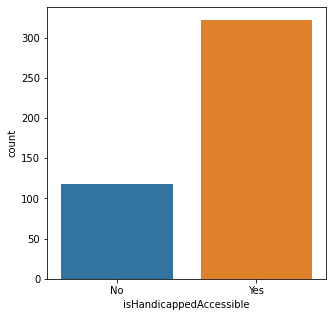

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['isHandicappedAccessible'], ax=ax)
plt.show()

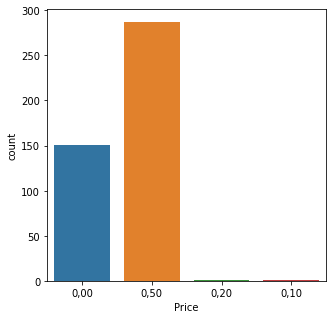

In [22]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['Price'], ax=ax)
plt.show()

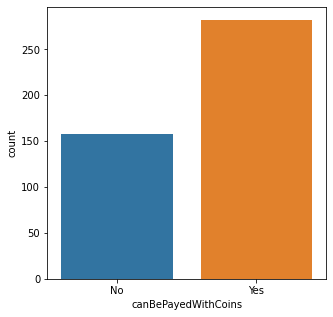

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['canBePayedWithCoins'], ax=ax)
plt.show()

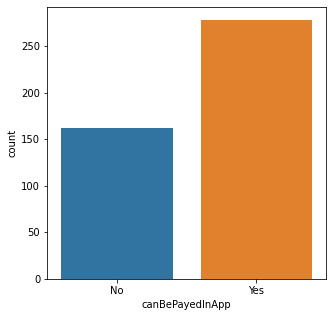

In [24]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['canBePayedInApp'], ax=ax)
plt.show()

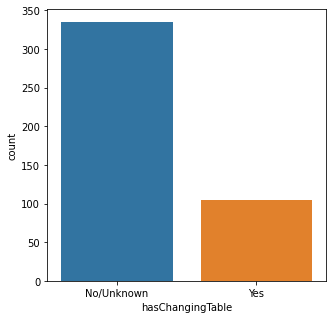

In [25]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['hasChangingTable'], ax=ax)
plt.show()

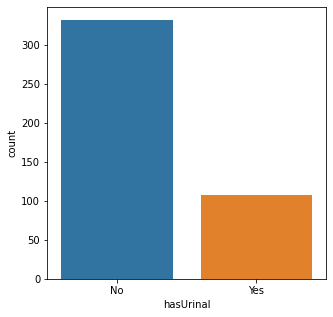

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['hasUrinal'], ax=ax)
plt.show()

In [27]:
# Adding placeholder google ratings
data['google_rating_rank']=np.random.randint(1,6,size=len(data.index))

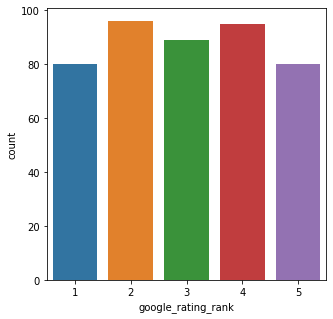

In [28]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['google_rating_rank'], ax=ax)
plt.show()

In [34]:
# Adding weights depending on the feature importance
mapping = {'Yes': 1, 'No': 0}

pricing = {'0.00': 5,'0.10':4, '0.20':3 ,'0.50':2}

#distancing = {}

# Assigning weights to individual features and storing them in new coulmns
 
data['isHandicappedAccessible_1'] = (data['isHandicappedAccessible'].replace(mapping))*2
data['Price_1'] = (data['Price'].replace(pricing))*5
data['canBePayedWithCoins_1'] = (data['canBePayedWithCoins'].replace(mapping))*3
data['canBePayedInApp_1'] = (data['canBePayedInApp'].replace(mapping))*2
data['hasChangingTable_1'] = (data['hasChangingTable'].replace(mapping))*2
data['hasUrinal_1'] = (data['hasUrinal'].replace(mapping))*3
data['google_rating_rank_1'] =(data['google_rating_rank'])*4
data['Comments']=''


#summing up weights of individual features

data['ratings'] = data[['isHandicappedAccessible_1','Price_1','canBePayedWithCoins_1','canBePayedInApp_1','hasChangingTable_1',
                    'hasUrinal_1','google_rating_rank_1']].sum(axis=1)

#Assigning the sum to rating ranging from 1-5. Example a sum of 40, is assigned between a range 30-40 
#and then the value is assigned to a rating of 4

#ranges = [0,4,10,20,40,np.inf]

#cat = ['1','2','3','4','5']

#data['ratings'] = pd.cut(data['Sum'], bins = ranges, labels = cat)

#if there are NaN values present in ratings those columns are dropped

data = data[~data['ratings'].isna()]

In [35]:
data

2,LavatoryID,Description,City,Street,opening_hours,street_address,PostalCode,Country,Longitude,Latitude,...,google_rating_rank,isHandicappedAccessible_1,Price_1,canBePayedWithCoins_1,canBePayedInApp_1,hasChangingTable_1,hasUrinal_1,google_rating_rank_1,ratings,Comments
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",0:00-24:00,"Krumme Lanke, Quermatenweg",14109,Deutschland,13.240575,52.453581,...,3,0,"0,000,000,000,000,00",0,0,No/UnknownNo/Unknown,0,12,12,
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",0:00-24:00,"Schlachtensee , Am Schlachtensee ggü. 145",14129,Deutschland,13.199229,52.436507,...,1,0,"0,000,000,000,000,00",0,0,No/UnknownNo/Unknown,0,4,4,
5,Wall_115753,Toilette Am Kiesteich 50,Berlin,Spektepark (0-24 Uhr),0:00-24:00,Spektepark,13589,Deutschland,13.164859,52.548840,...,4,0,"0,000,000,000,000,00",0,0,No/UnknownNo/Unknown,0,16,16,
6,Wall_116738,"Wall CT, Hubertusdamm",Berlin,Hubertusdamm ggü. 7 (0-24 Uhr),0:00-24:00,Hubertusdamm ggü. 7,13125,Deutschland,13.471198,52.615671,...,4,2,"0,500,500,500,500,50",3,2,2,3,16,26,
7,Wall_116739,"Wall CT, Lindenufer",Berlin,Lindenufer ggü. 10 (0-24 Uhr),0:00-24:00,Lindenufer ggü. 10,13597,Deutschland,13.207764,52.537351,...,4,2,"0,500,500,500,500,50",3,2,2,0,16,23,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,Fremd_5,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,Tempelhofer Feld,12049,Deutschland,13.417550,52.476810,...,2,2,"0,000,000,000,000,00",0,0,No/UnknownNo/Unknown,0,8,10,
439,Fremd_6,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,Tempelhofer Feld,12049,Deutschland,13.417660,52.470190,...,5,2,"0,000,000,000,000,00",0,0,No/UnknownNo/Unknown,0,20,22,
440,Fremd_7,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,Tempelhofer Feld,12101,Deutschland,13.386770,52.471300,...,4,2,"0,000,000,000,000,00",0,0,No/UnknownNo/Unknown,0,16,18,
441,Fremd_8,Toilette Tempelhofer Feld,Berlin,Tempelhofer Feld,NaN,Tempelhofer Feld,10965,Deutschland,13.409950,52.479400,...,2,2,"0,000,000,000,000,00",0,0,No/UnknownNo/Unknown,0,8,10,


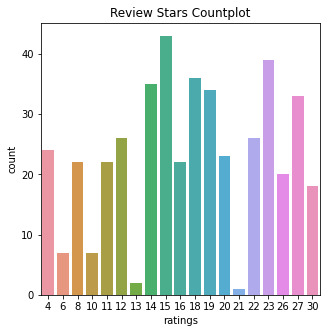

In [33]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(data['ratings'], ax=ax)
plt.title('Review Stars Countplot')
plt.show()

In [36]:
top_toilets=data[['LavatoryID','Description','City','Street','opening_hours','street_address','PostalCode',
       'Country','Longitude','Latitude','isOwnedByWall',
       'isHandicappedAccessible','Price','canBePayedWithCoins',
       'canBePayedInApp','canBePayedWithNFC','hasChangingTable','LabelID',
       'hasUrinal','ratings','Comments']].sort_values(by=['ratings'], ascending=False)

In [37]:
top_toilets

2,LavatoryID,Description,City,Street,opening_hours,street_address,PostalCode,Country,Longitude,Latitude,...,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,ratings,Comments
55,Wall_120188,"Wall CT, Gneisenaustr.",Berlin,Gneisenaustr. 39 (0-24 Uhr),0:00-24:00,Gneisenaustr. 39,10961,Deutschland,13.398054,52.490534,...,Yes,"0,50",Yes,Yes,Yes,No/Unknown,Berliner Toilette,Yes,30,
191,Wall_122942,"Wall CT, Rudolfplatz, Modersohnstr.",Berlin,"Rudolfplatz, Modersohnstr. ggü. 53-55 (0-24 Uhr)",0:00-24:00,"Rudolfplatz, Modersohnstr. ggü. 53-55",10245,Deutschland,13.456859,52.502683,...,Yes,"0,50",Yes,Yes,Yes,No/Unknown,Berliner Toilette,Yes,30,
233,Wall_123498,"Wall CT, Edinburger Str.",Berlin,Edinburger Str. 38 (0-24 Uhr),0:00-24:00,Edinburger Str. 38,13349,Deutschland,13.348329,52.556111,...,Yes,"0,50",Yes,Yes,Yes,Yes,Berliner Toilette,Yes,30,
228,Wall_123492,"Wall CT, Görlitzer Park, Zugang",Berlin,"Görlitzer Park, Zugang (0-24 Uhr)",0:00-24:00,"Görlitzer Park, Zugang",10999,Deutschland,13.432168,52.499099,...,Yes,"0,50",Yes,Yes,Yes,No/Unknown,Berliner Toilette,Yes,30,
284,Wall_124615,"Wall CT, Sportforum, Weißenseer Weg",Berlin,"Sportforum, Weißenseer Weg vor 53 (0-24 Uhr)",0:00-24:00,"Sportforum, Weißenseer Weg vor 53",13053,Deutschland,13.472384,52.537874,...,Yes,"0,50",Yes,Yes,Yes,Yes,Berliner Toilette,Yes,30,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Wall_5366,Toilette Wilmersdorfer Str. staw. (Parkplatz),Berlin,Schillerstr. (0-24 Uhr),0:00-24:00,Schillerstr.,10625,Deutschland,13.306736,52.510167,...,No,"0,00",No,No,No,No/Unknown,weitere ÖTs (z.B. Sanitärcontainer),No,4,
417,Fremd_167,"Toilette Friedhof Baumschulenweg,Öffentl.",Berlin,"Friedhof Baumschulenweg,Öffentl.",NaN,"Friedhof Baumschulenweg,Öffentl.",12437,Deutschland,13.493790,52.460540,...,No,"0,00",No,No,No,No/Unknown,Toilette nicht von Wall,No,4,
329,Wall_5362,Toilette Havelberger Str.,Berlin,"Stephanplatz , Stephanstr. (0-24 Uhr)",0:00-24:00,"Stephanplatz , Stephanstr.",10559,Deutschland,13.347014,52.533528,...,No,"0,00",No,No,No,No/Unknown,Café Achteck,No,4,
326,Wall_5359,Toilette Fellbacher Str.,Berlin,"Fellbacher Platz , Heinsestr. (0-24 Uhr)",0:00-24:00,"Fellbacher Platz , Heinsestr.",13467,Deutschland,13.307611,52.616139,...,No,"0,00",No,No,No,No/Unknown,Café Achteck,No,4,


In [38]:
top_toilets.to_csv('C:/Users/Joma/Techlabs/st22-peedom/Data/top_toilets.csv')